In [290]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [291]:
df = pd.read_csv("car_prices.csv")
df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

In [292]:
df = df.drop(columns = ["saledate"])
df = df.dropna(subset=['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state', 'condition', 'odometer', 'color', 'interior', 'seller', 'mmr', 'sellingprice'])

categorical_cols = [
    'make','model','trim','body','transmission',
    'vin','state','condition','color','interior','seller'
]

label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 472325 entries, 0 to 558836
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          472325 non-null  int64  
 1   make          472325 non-null  int64  
 2   model         472325 non-null  int64  
 3   trim          472325 non-null  int64  
 4   body          472325 non-null  int64  
 5   transmission  472325 non-null  int64  
 6   vin           472325 non-null  int64  
 7   state         472325 non-null  int64  
 8   condition     472325 non-null  int64  
 9   odometer      472325 non-null  float64
 10  color         472325 non-null  int64  
 11  interior      472325 non-null  int64  
 12  seller        472325 non-null  int64  
 13  mmr           472325 non-null  float64
 14  sellingprice  472325 non-null  float64
dtypes: float64(3), int64(12)
memory usage: 57.7 MB


In [294]:
X = df.drop(columns=["sellingprice"])
y = df["sellingprice"]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [295]:
model = LinearRegression()
model.fit(X_train, y_train)

pred = model.predict(X_test)

MSE = mean_squared_error(y_test, pred)

print("Test R²:", r2_score(y_test, pred))
print("Test MAE:", mean_absolute_error(y_test, pred))
print(MSE/y_test.var())

Test R²: 0.9713472833900364
Test MAE: 1033.4142443076505
0.028652413294274058


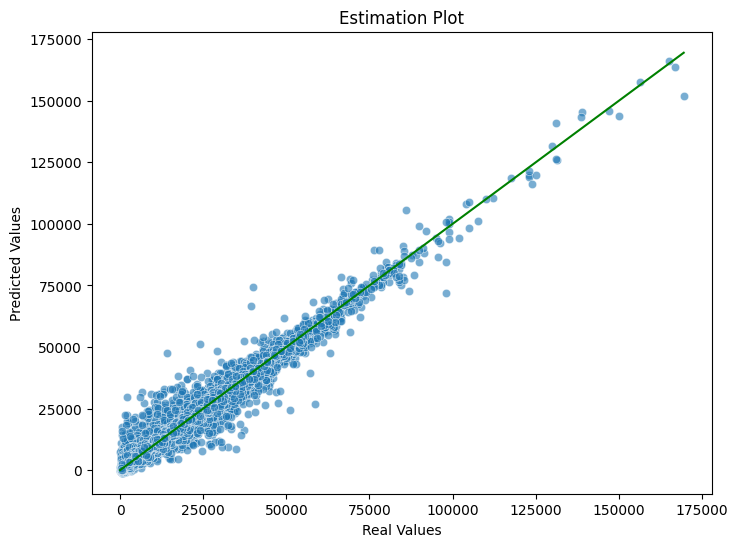

In [296]:
df_plot = pd.DataFrame({
    'Actual': y_test,
    'Predicted': pred
})

plt.figure(figsize=(8,6))
sns.scatterplot(x='Actual', y='Predicted', data=df_plot, alpha=0.6)
sns.lineplot(x='Actual', y='Actual', data=df_plot, color='green')
plt.title('Estimation Plot')
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.show()

***Sample Input***

In [297]:
sample = {
    "year": 2018,
    "make": "Toyota",
    "model": "Camry",
    "trim": "SE",
    "body": "Sedan",
    "transmission": "Automatic",
    "vin": "4T1B11HK5JU123456",
    "state": "CA",
    "condition": "Good",
    "odometer": 48215,
    "color": "White",
    "interior": "Black",
    "seller": "Sunrise Auto Sales",
    "mmr": 18500
}

sample_df = pd.DataFrame([sample])

for col in categorical_cols:
    le = label_encoders[col]
    val = sample_df.at[0, col]

    if val not in le.classes_:
        val = le.classes_[0]

    sample_df[col] = le.transform([val])

sample_df = sample_df[X.columns]

prediction = model.predict(sample_df)
print("Predicted selling price:", prediction[0])


Predicted selling price: 16749.654423089625
